In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Dataset 1

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X2 = breast_cancer_wisconsin_diagnostic.data.features 
y2 = breast_cancer_wisconsin_diagnostic.data.targets 
X2.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y2['Diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: object

In [4]:
le = LabelEncoder()
y2['Diagnosis'] = le.fit_transform(y2['Diagnosis'])
X2_with_target = X2.copy()
X2_with_target['target'] = y2['Diagnosis']
correlations = X2_with_target.corr()['target'].drop('target')
top_10_features_d1 = correlations.abs().sort_values(ascending=False).head(10)
top_10_features_d1

concave_points3    0.793566
perimeter3         0.782914
concave_points1    0.776614
radius3            0.776454
perimeter1         0.742636
area3              0.733825
radius1            0.730029
area1              0.708984
concavity1         0.696360
concavity3         0.659610
Name: target, dtype: float64

In [5]:
X2_top_10 = X2[top_10_features_d1.index]
X2_top_10.head()

,concave_points3,perimeter3,concave_points1,radius3,perimeter1,area3,radius1,area1,concavity1,concavity3
0,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119
1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416
2,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504
3,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869
4,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000


Three models: logistic regression, Random forest classifier and SVM

Dataset1 - Partition 20:80
Train Acc: 0.9705, Val Acc: 0.9414, Test Acc: 0.9187


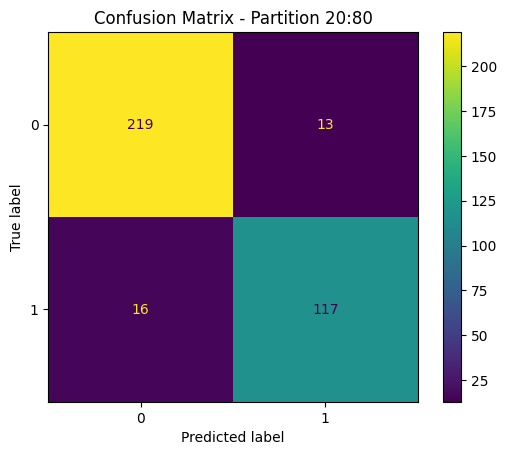

Dataset1 - Partition 50:50
Train Acc: 0.9636, Val Acc: 0.9507, Test Acc: 0.9231


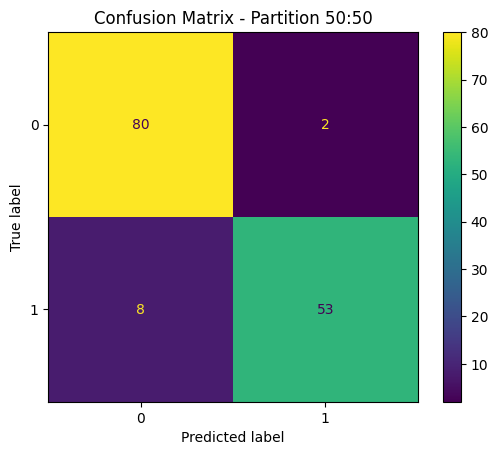

Dataset1 - Partition 80:20
Train Acc: 0.9553, Val Acc: 0.9377, Test Acc: 0.9420


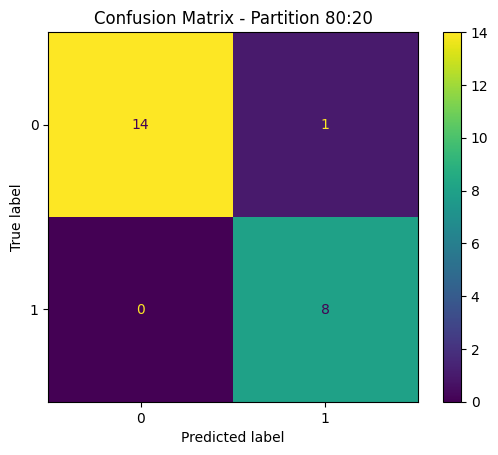

In [6]:
test_sizes = [0.8, 0.5, 0.2]
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
dataset = ("Dataset1", X2_top_10, y2['Diagnosis'].astype(int))
n_trials = 3

# Results storage
results_d1_svm = []

# Main loop
X, y = dataset[1], dataset[2]
for test_size in test_sizes:
    train_acc_list, val_acc_list, test_acc_list = [], [], []

    for trial in range(n_trials):
        # print(trial)
        # Data splitting
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=trial)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=trial)

        # Hyperparameter tuning and training
        grid_search = GridSearchCV(SVC(), param_grid, cv=3, return_train_score=True)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        # Accuracy calculations
        train_acc_list.append(accuracy_score(y_train, best_clf.predict(X_train)))
        val_acc_list.append(accuracy_score(y_val, best_clf.predict(X_val)))
        test_acc_list.append(accuracy_score(y_test, best_clf.predict(X_test)))

    # Compute and store average accuracies
    avg_train_acc = np.mean(train_acc_list)
    avg_val_acc = np.mean(val_acc_list)
    avg_test_acc = np.mean(test_acc_list)

    results_d1_svm.append({
        "dataset": dataset[0],
        "model": "SVM",
        "partition": f"{int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}",
        "train_acc": avg_train_acc,
        "val_acc": avg_val_acc,
        "test_acc": avg_test_acc
    })

    # Logging
    print(f"{dataset[0]} - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    print(f"Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}, Test Acc: {avg_test_acc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, best_clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    plt.show()

In [7]:
results_d1_svm

[{'dataset': 'Dataset1',
  'model': 'SVM',
  'partition': '20:80',
  'train_acc': 0.9705014749262536,
  'val_acc': 0.9413919413919415,
  'test_acc': 0.9187214611872146},
 {'dataset': 'Dataset1',
  'model': 'SVM',
  'partition': '50:50',
  'train_acc': 0.9636150234741785,
  'val_acc': 0.9507042253521126,
  'test_acc': 0.923076923076923},
 {'dataset': 'Dataset1',
  'model': 'SVM',
  'partition': '80:20',
  'train_acc': 0.9553113553113554,
  'val_acc': 0.9377289377289376,
  'test_acc': 0.9420289855072465}]

Dataset1 - Partition 20:80
Train Acc: 0.9823, Val Acc: 0.9194, Test Acc: 0.9123


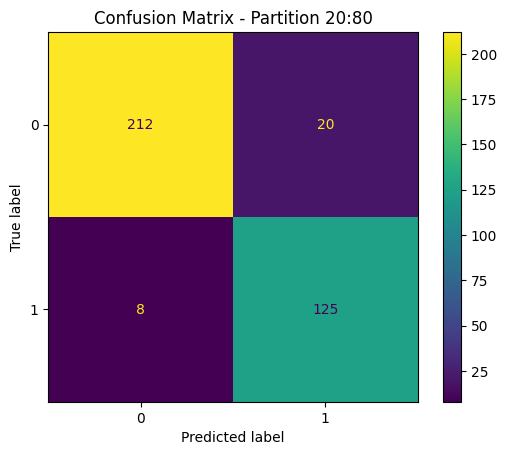

Dataset1 - Partition 50:50
Train Acc: 0.9859, Val Acc: 0.9366, Test Acc: 0.9254


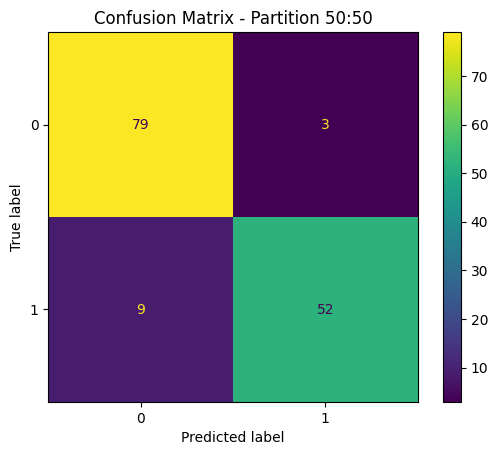

Dataset1 - Partition 80:20
Train Acc: 0.9890, Val Acc: 0.9451, Test Acc: 0.9275


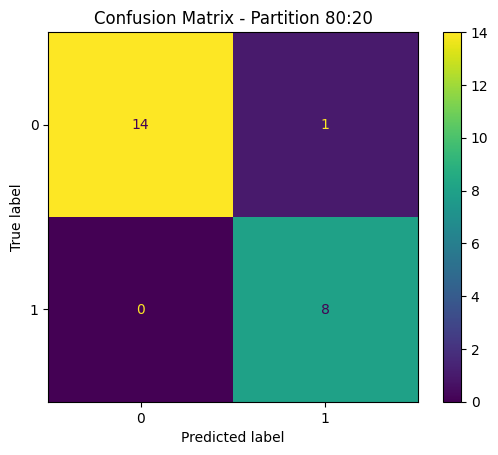

In [8]:
param_grid = {
    'n_estimators': [20, 50, 100],         
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt']
}

# Results storage
results_d1_rf = []

# Main loop
X, y = dataset[1], dataset[2]
for test_size in test_sizes:
    train_acc_list, val_acc_list, test_acc_list = [], [], []

    for trial in range(n_trials):
        # print(trial)
        # Data splitting
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=trial)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=trial)

        # Hyperparameter tuning and training
        grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, return_train_score=True)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        # Accuracy calculations
        train_acc_list.append(accuracy_score(y_train, best_clf.predict(X_train)))
        val_acc_list.append(accuracy_score(y_val, best_clf.predict(X_val)))
        test_acc_list.append(accuracy_score(y_test, best_clf.predict(X_test)))

    # Compute and store average accuracies
    avg_train_acc = np.mean(train_acc_list)
    avg_val_acc = np.mean(val_acc_list)
    avg_test_acc = np.mean(test_acc_list)

    results_d1_rf.append({
        "dataset": dataset[0],
        "model": "Random Forest Classifier",
        "partition": f"{int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}",
        "train_acc": avg_train_acc,
        "val_acc": avg_val_acc,
        "test_acc": avg_test_acc
    })

    # Logging
    print(f"{dataset[0]} - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    print(f"Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}, Test Acc: {avg_test_acc:.4f}")
    # Confusion Matrix
    cm = confusion_matrix(y_test, best_clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    plt.show()

In [9]:
results_d1_rf

[{'dataset': 'Dataset1',
  'model': 'Random Forest Classifier',
  'partition': '20:80',
  'train_acc': 0.9823008849557522,
  'val_acc': 0.9194139194139194,
  'test_acc': 0.9123287671232876},
 {'dataset': 'Dataset1',
  'model': 'Random Forest Classifier',
  'partition': '50:50',
  'train_acc': 0.9859154929577465,
  'val_acc': 0.9366197183098591,
  'test_acc': 0.9254079254079254},
 {'dataset': 'Dataset1',
  'model': 'Random Forest Classifier',
  'partition': '80:20',
  'train_acc': 0.989010989010989,
  'val_acc': 0.9450549450549449,
  'test_acc': 0.927536231884058}]

Dataset1 - Partition 20:80
Train Acc: 0.9617, Val Acc: 0.9414, Test Acc: 0.9324


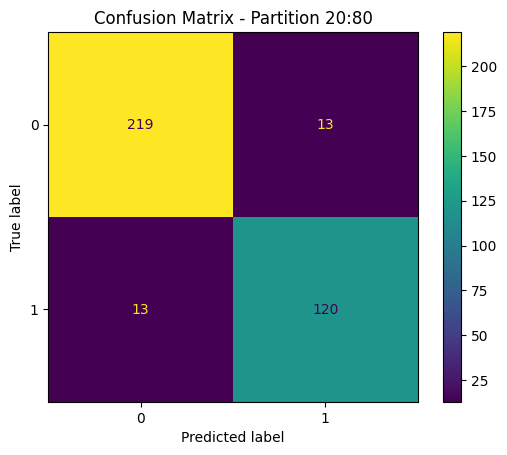

Dataset1 - Partition 50:50
Train Acc: 0.9707, Val Acc: 0.9484, Test Acc: 0.9301


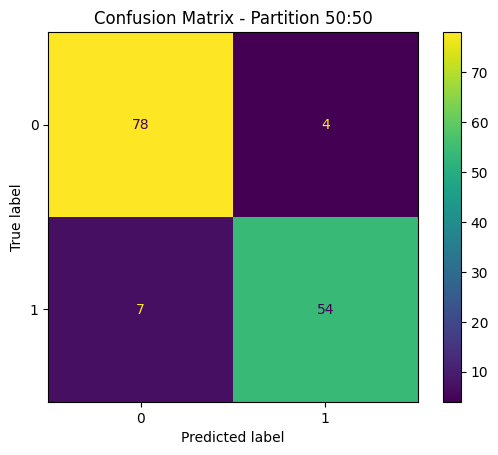

Dataset1 - Partition 80:20
Train Acc: 0.9582, Val Acc: 0.9341, Test Acc: 0.9420


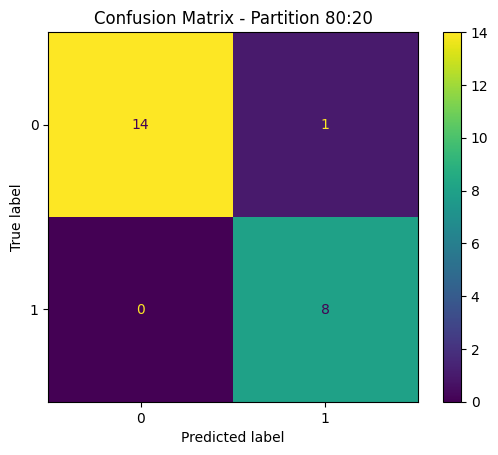

In [10]:
param_grid = {
    'C': [0.01,0.1, 1, 10, 100], 
    'penalty': ['l1','l2']
}

# Results storage
results_d1_log = []

# Main loop
X, y = dataset[1], dataset[2]
for test_size in test_sizes:
    train_acc_list, val_acc_list, test_acc_list = [], [], []
    hyperparam_results = []

    for trial in range(n_trials):
        # print(trial)
        # Data splitting
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=trial)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=trial)

        # Hyperparameter tuning and training
        grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, return_train_score=True)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        # Accuracy calculations
        train_acc_list.append(accuracy_score(y_train, best_clf.predict(X_train)))
        val_acc_list.append(accuracy_score(y_val, best_clf.predict(X_val)))
        test_acc_list.append(accuracy_score(y_test, best_clf.predict(X_test)))

    # Compute and store average accuracies
    avg_train_acc = np.mean(train_acc_list)
    avg_val_acc = np.mean(val_acc_list)
    avg_test_acc = np.mean(test_acc_list)

    results_d1_log.append({
        "dataset": dataset[0],
        "model": "Logistic Regression",
        "partition": f"{int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}",
        "train_acc": avg_train_acc,
        "val_acc": avg_val_acc,
        "test_acc": avg_test_acc
    })

    # Logging
    print(f"{dataset[0]} - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    print(f"Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}, Test Acc: {avg_test_acc:.4f}")
    
    cm = confusion_matrix(y_test, best_clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    plt.show()

In [11]:
results_d1_log

[{'dataset': 'Dataset1',
  'model': 'Logistic Regression',
  'partition': '20:80',
  'train_acc': 0.9616519174041297,
  'val_acc': 0.9413919413919413,
  'test_acc': 0.932420091324201},
 {'dataset': 'Dataset1',
  'model': 'Logistic Regression',
  'partition': '50:50',
  'train_acc': 0.9706572769953051,
  'val_acc': 0.948356807511737,
  'test_acc': 0.93006993006993},
 {'dataset': 'Dataset1',
  'model': 'Logistic Regression',
  'partition': '80:20',
  'train_acc': 0.9582417582417583,
  'val_acc': 0.934065934065934,
  'test_acc': 0.9420289855072465}]

# Dataset 2

In [12]:
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529) 
  
# data (as pandas dataframes) 
X_2 = early_stage_diabetes_risk_prediction.data.features 
Y = early_stage_diabetes_risk_prediction.data.targets 

In [13]:
Y.isnull().any()

class    False
dtype: bool

In [14]:
le = LabelEncoder()
need_encode = X_2.drop(columns=['age']).columns.tolist()
for i in need_encode:
    X_2.loc[:, i] = le.fit_transform(X_2[i])
X_2

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [15]:
le = LabelEncoder()
Y.loc[:,'class']= le.fit_transform(Y['class'])
Y['class'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

Dataset2 - Partition 20:80
Train Acc: 0.9455, Val Acc: 0.8474, Test Acc: 0.8819


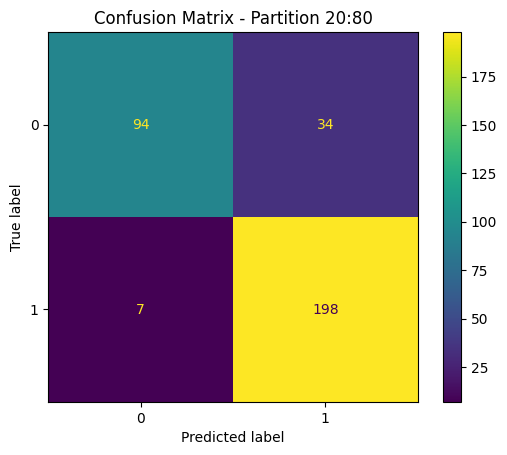

Dataset2 - Partition 50:50
Train Acc: 0.9218, Val Acc: 0.8897, Test Acc: 0.9179


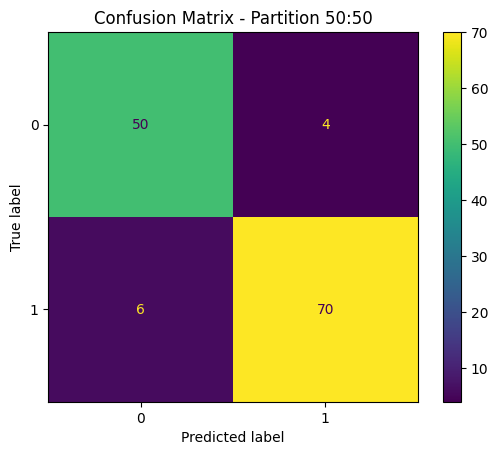

Dataset2 - Partition 80:20
Train Acc: 0.9415, Val Acc: 0.9317, Test Acc: 0.9524


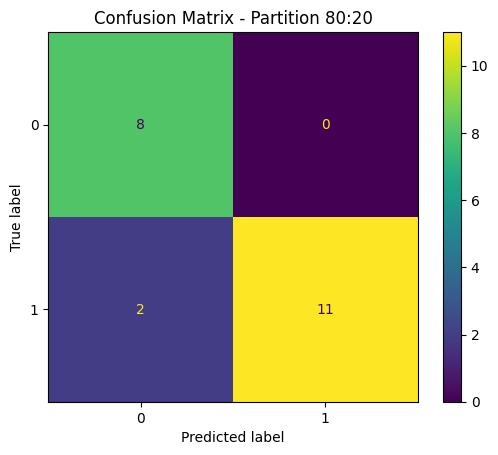

In [16]:
# Configuration
test_sizes = [0.8, 0.5, 0.2]
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
dataset2 = ("Dataset2", X_2, Y['class'].astype(int))
n_trials = 3

# Results storage
results_d2_svm = []

# Main loop
X, y = dataset2[1], dataset2[2]
for test_size in test_sizes:
    train_acc_list, val_acc_list, test_acc_list = [], [], []

    for trial in range(n_trials):
        # print(trial)
        # Data splitting
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=trial)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=trial)

        # Hyperparameter tuning and training
        grid_search = GridSearchCV(SVC(), param_grid, cv=3)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        # Accuracy calculations
        train_acc_list.append(accuracy_score(y_train, best_clf.predict(X_train)))
        val_acc_list.append(accuracy_score(y_val, best_clf.predict(X_val)))
        test_acc_list.append(accuracy_score(y_test, best_clf.predict(X_test)))

    # Compute and store average accuracies
    avg_train_acc = np.mean(train_acc_list)
    avg_val_acc = np.mean(val_acc_list)
    avg_test_acc = np.mean(test_acc_list)

    results_d2_svm.append({
        "dataset": dataset2[0],
        "model": "SVM",
        "partition": f"{int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}",
        "train_acc": avg_train_acc,
        "val_acc": avg_val_acc,
        "test_acc": avg_test_acc
    })

    # Logging
    print(f"{dataset2[0]} - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    print(f"Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}, Test Acc: {avg_test_acc:.4f}")
    # Confusion Matrix
    cm = confusion_matrix(y_test, best_clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    plt.show()

In [17]:
results_d2_svm

[{'dataset': 'Dataset2',
  'model': 'SVM',
  'partition': '20:80',
  'train_acc': 0.9455128205128206,
  'val_acc': 0.8473895582329317,
  'test_acc': 0.8818818818818818},
 {'dataset': 'Dataset2',
  'model': 'SVM',
  'partition': '50:50',
  'train_acc': 0.9217948717948717,
  'val_acc': 0.8897435897435898,
  'test_acc': 0.9179487179487179},
 {'dataset': 'Dataset2',
  'model': 'SVM',
  'partition': '80:20',
  'train_acc': 0.9415064102564102,
  'val_acc': 0.9317269076305221,
  'test_acc': 0.9523809523809524}]

Dataset2 - Partition 20:80
Train Acc: 0.9679, Val Acc: 0.8956, Test Acc: 0.8889


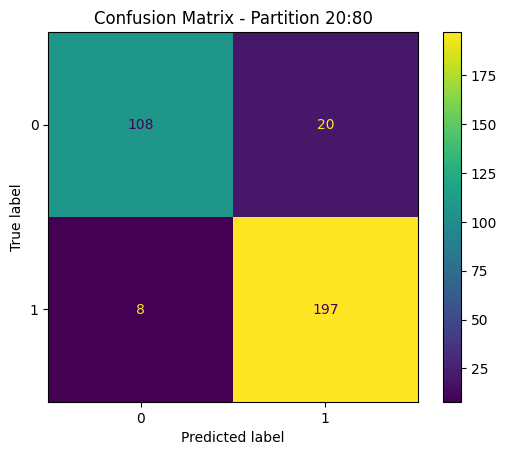

Dataset2 - Partition 50:50
Train Acc: 0.9987, Val Acc: 0.9744, Test Acc: 0.9744


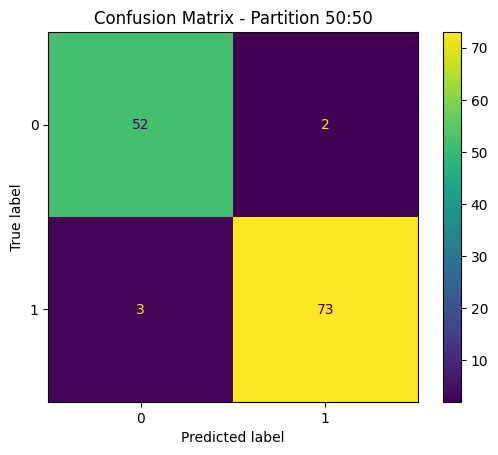

Dataset2 - Partition 80:20
Train Acc: 1.0000, Val Acc: 0.9920, Test Acc: 0.9841


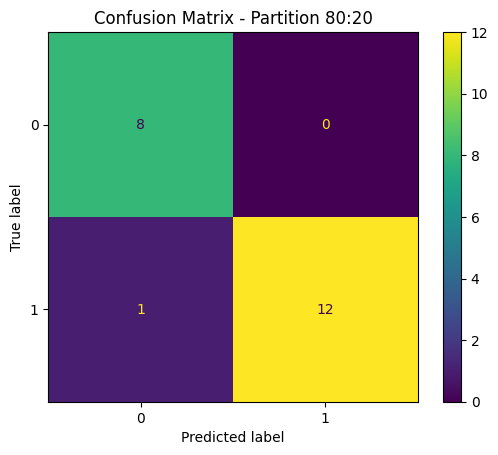

In [18]:
param_grid = {
    'n_estimators': [20, 50, 100],         
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt']
}

# Results storage
results_d2_rf = []

# Main loop
X, y = dataset2[1], dataset2[2]
for test_size in test_sizes:
    train_acc_list, val_acc_list, test_acc_list = [], [], []

    for trial in range(n_trials):
        # print(trial)
        # Data splitting
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=trial)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=trial)

        # Hyperparameter tuning and training
        grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        # Accuracy calculations
        train_acc_list.append(accuracy_score(y_train, best_clf.predict(X_train)))
        val_acc_list.append(accuracy_score(y_val, best_clf.predict(X_val)))
        test_acc_list.append(accuracy_score(y_test, best_clf.predict(X_test)))

    # Compute and store average accuracies
    avg_train_acc = np.mean(train_acc_list)
    avg_val_acc = np.mean(val_acc_list)
    avg_test_acc = np.mean(test_acc_list)

    results_d2_rf.append({
        "dataset": dataset2[0],
        "model": "Random Forest Classifier",
        "partition": f"{int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}",
        "train_acc": avg_train_acc,
        "val_acc": avg_val_acc,
        "test_acc": avg_test_acc
    })

    # Logging
    print(f"{dataset2[0]} - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    print(f"Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}, Test Acc: {avg_test_acc:.4f}")
    # Confusion Matrix
    cm = confusion_matrix(y_test, best_clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    plt.show()

In [19]:
results_d2_rf

[{'dataset': 'Dataset2',
  'model': 'Random Forest Classifier',
  'partition': '20:80',
  'train_acc': 0.9679487179487181,
  'val_acc': 0.895582329317269,
  'test_acc': 0.8888888888888888},
 {'dataset': 'Dataset2',
  'model': 'Random Forest Classifier',
  'partition': '50:50',
  'train_acc': 0.9987179487179487,
  'val_acc': 0.9743589743589745,
  'test_acc': 0.9743589743589745},
 {'dataset': 'Dataset2',
  'model': 'Random Forest Classifier',
  'partition': '80:20',
  'train_acc': 1.0,
  'val_acc': 0.9919678714859438,
  'test_acc': 0.9841269841269842}]

Dataset2 - Partition 20:80
Train Acc: 0.9487, Val Acc: 0.8715, Test Acc: 0.8949


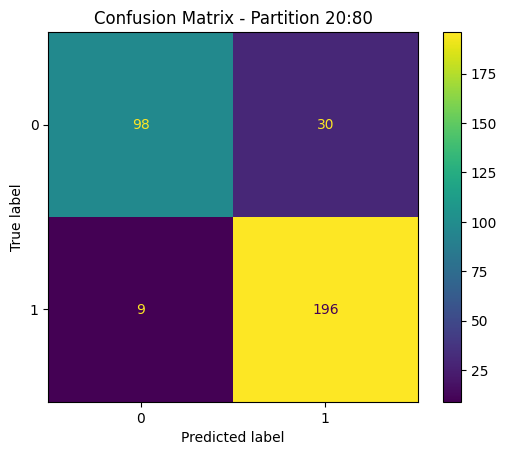

Dataset2 - Partition 50:50
Train Acc: 0.9359, Val Acc: 0.8923, Test Acc: 0.9410


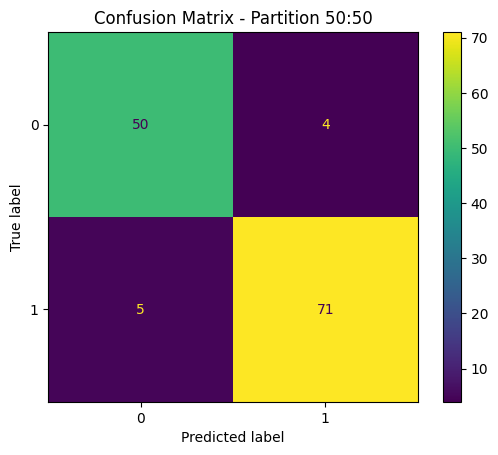

Dataset2 - Partition 80:20
Train Acc: 0.9367, Val Acc: 0.9398, Test Acc: 0.9365


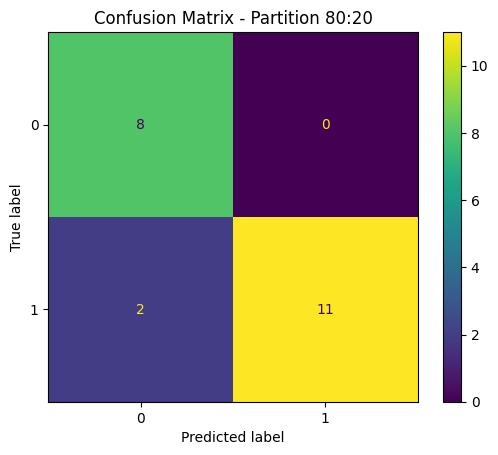

In [20]:
param_grid = {
    'C': [0.01,0.1, 1, 10, 100], 
    'penalty': ['l1','l2']
}

# Results storage
results_d2_log = []

# Main loop
X, y = dataset2[1], dataset2[2]
for test_size in test_sizes:
    train_acc_list, val_acc_list, test_acc_list = [], [], []

    for trial in range(n_trials):
        # print(trial)
        # Data splitting
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=trial)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=trial)

        # Hyperparameter tuning and training
        grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        # Accuracy calculations
        train_acc_list.append(accuracy_score(y_train, best_clf.predict(X_train)))
        val_acc_list.append(accuracy_score(y_val, best_clf.predict(X_val)))
        test_acc_list.append(accuracy_score(y_test, best_clf.predict(X_test)))

    # Compute and store average accuracies
    avg_train_acc = np.mean(train_acc_list)
    avg_val_acc = np.mean(val_acc_list)
    avg_test_acc = np.mean(test_acc_list)

    results_d2_log.append({
        "dataset": dataset2[0],
        "model": "Logistic Regression",
        "partition": f"{int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}",
        "train_acc": avg_train_acc,
        "val_acc": avg_val_acc,
        "test_acc": avg_test_acc
    })

    # Logging
    print(f"{dataset2[0]} - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    print(f"Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}, Test Acc: {avg_test_acc:.4f}")
    # Confusion Matrix
    cm = confusion_matrix(y_test, best_clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    plt.show()

In [21]:
results_d2_log

[{'dataset': 'Dataset2',
  'model': 'Logistic Regression',
  'partition': '20:80',
  'train_acc': 0.9487179487179488,
  'val_acc': 0.8714859437751005,
  'test_acc': 0.8948948948948948},
 {'dataset': 'Dataset2',
  'model': 'Logistic Regression',
  'partition': '50:50',
  'train_acc': 0.9358974358974358,
  'val_acc': 0.8923076923076924,
  'test_acc': 0.9410256410256409},
 {'dataset': 'Dataset2',
  'model': 'Logistic Regression',
  'partition': '80:20',
  'train_acc': 0.936698717948718,
  'val_acc': 0.9397590361445783,
  'test_acc': 0.9365079365079364}]

# Dataset 3

In [22]:
raisin = fetch_ucirepo(id=850) 
  
# data (as pandas dataframes) 
X3 = raisin.data.features 
y3 = raisin.data.targets 

In [23]:
le = LabelEncoder()
y3.loc[:,'Class']= le.fit_transform(y3['Class']).astype(int)
y3['Class'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Class, Length: 900, dtype: int64

Dataset3 - Partition 20:80
Train Acc: 0.8778, Val Acc: 0.8495, Test Acc: 0.8628


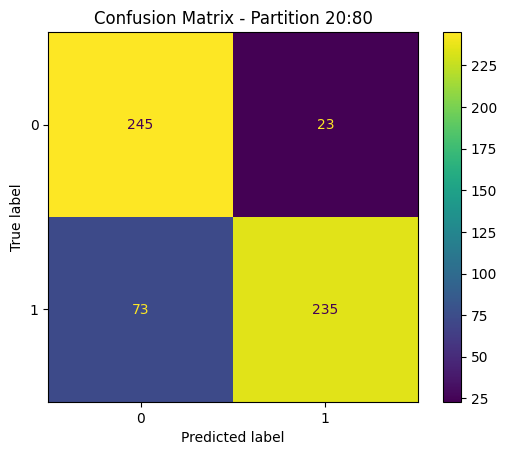

Dataset3 - Partition 50:50
Train Acc: 0.8489, Val Acc: 0.8385, Test Acc: 0.8504


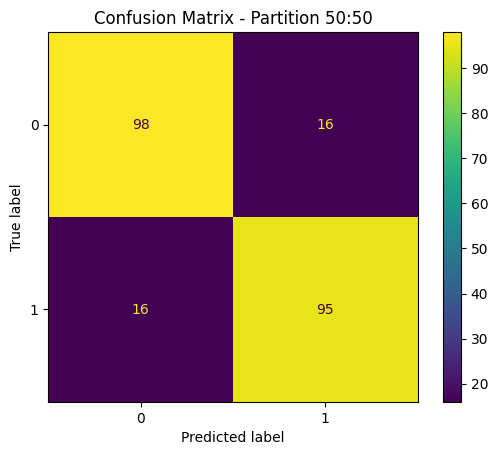

Dataset3 - Partition 80:20
Train Acc: 0.8648, Val Acc: 0.8819, Test Acc: 0.8426


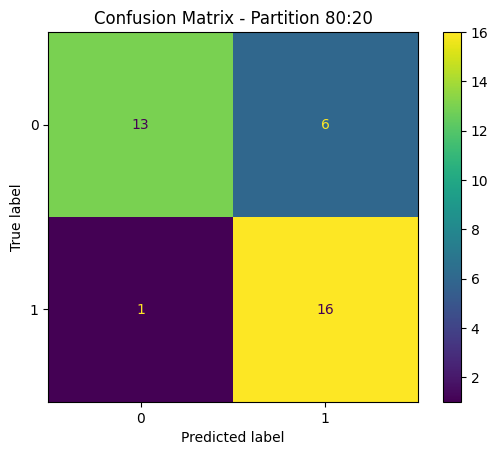

In [24]:
# Configuration
test_sizes = [0.8, 0.5, 0.2]
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
dataset3 = ("Dataset3", X3, y3['Class'].astype(int))
n_trials = 3

# Results storage
results_d3_svm = []

# Main loop
X, y = dataset3[1], dataset3[2]
for test_size in test_sizes:
    train_acc_list, val_acc_list, test_acc_list = [], [], []

    for trial in range(n_trials):
        # print(trial)
        # Data splitting
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=trial)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=trial)

        # Hyperparameter tuning and training
        grid_search = GridSearchCV(SVC(), param_grid, cv=3)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        # Accuracy calculations
        train_acc_list.append(accuracy_score(y_train, best_clf.predict(X_train)))
        val_acc_list.append(accuracy_score(y_val, best_clf.predict(X_val)))
        test_acc_list.append(accuracy_score(y_test, best_clf.predict(X_test)))

    # Compute and store average accuracies
    avg_train_acc = np.mean(train_acc_list)
    avg_val_acc = np.mean(val_acc_list)
    avg_test_acc = np.mean(test_acc_list)

    results_d3_svm.append({
        "dataset": dataset3[0],
        "model": "SVM",
        "partition": f"{int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}",
        "train_acc": avg_train_acc,
        "val_acc": avg_val_acc,
        "test_acc": avg_test_acc
    })

    # Logging
    print(f"{dataset3[0]} - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    print(f"Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}, Test Acc: {avg_test_acc:.4f}")
    # Confusion Matrix
    cm = confusion_matrix(y_test, best_clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    plt.show()

In [25]:
results_d3_svm

[{'dataset': 'Dataset3',
  'model': 'SVM',
  'partition': '20:80',
  'train_acc': 0.8777777777777778,
  'val_acc': 0.8495370370370371,
  'test_acc': 0.8628472222222223},
 {'dataset': 'Dataset3',
  'model': 'SVM',
  'partition': '50:50',
  'train_acc': 0.8488888888888889,
  'val_acc': 0.8385185185185186,
  'test_acc': 0.8503703703703703},
 {'dataset': 'Dataset3',
  'model': 'SVM',
  'partition': '80:20',
  'train_acc': 0.8648148148148148,
  'val_acc': 0.8819444444444443,
  'test_acc': 0.8425925925925926}]

Dataset3 - Partition 20:80
Train Acc: 0.8889, Val Acc: 0.8333, Test Acc: 0.8542


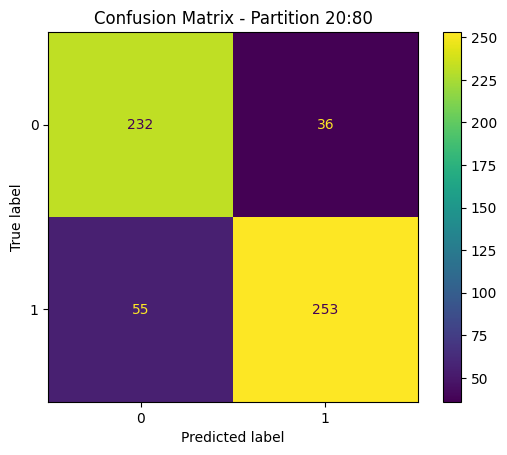

Dataset3 - Partition 50:50
Train Acc: 0.9563, Val Acc: 0.8519, Test Acc: 0.8726


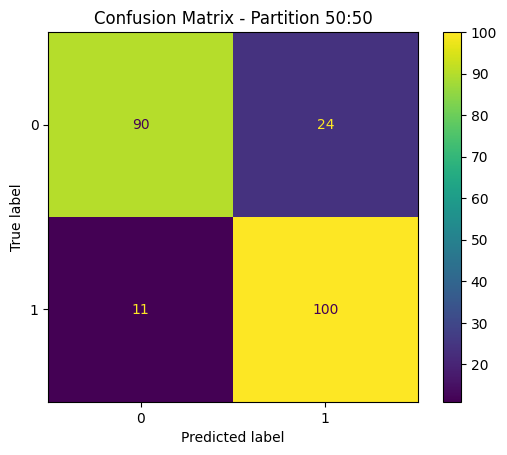

Dataset3 - Partition 80:20
Train Acc: 0.9500, Val Acc: 0.8843, Test Acc: 0.8611


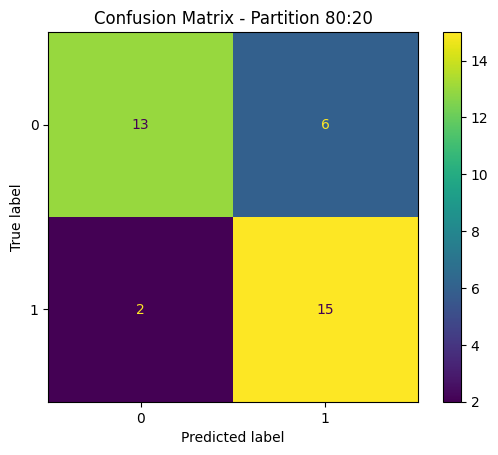

In [26]:
param_grid = {
    'n_estimators': [20, 50, 100],         
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt']
}

# Results storage
results_d3_rf = []

# Main loop
X, y = dataset3[1], dataset3[2]
for test_size in test_sizes:
    train_acc_list, val_acc_list, test_acc_list = [], [], []

    for trial in range(n_trials):
        # print(trial)
        # Data splitting
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=trial)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=trial)

        # Hyperparameter tuning and training
        grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        # Accuracy calculations
        train_acc_list.append(accuracy_score(y_train, best_clf.predict(X_train)))
        val_acc_list.append(accuracy_score(y_val, best_clf.predict(X_val)))
        test_acc_list.append(accuracy_score(y_test, best_clf.predict(X_test)))

    # Compute and store average accuracies
    avg_train_acc = np.mean(train_acc_list)
    avg_val_acc = np.mean(val_acc_list)
    avg_test_acc = np.mean(test_acc_list)

    results_d3_rf.append({
        "dataset": dataset3[0],
        "model": "Random Forest Classifier",
        "partition": f"{int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}",
        "train_acc": avg_train_acc,
        "val_acc": avg_val_acc,
        "test_acc": avg_test_acc
    })

    # Logging
    print(f"{dataset3[0]} - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    print(f"Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}, Test Acc: {avg_test_acc:.4f}")
    # Confusion Matrix
    cm = confusion_matrix(y_test, best_clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    plt.show()

In [27]:
results_d3_rf

[{'dataset': 'Dataset3',
  'model': 'Random Forest Classifier',
  'partition': '20:80',
  'train_acc': 0.8888888888888888,
  'val_acc': 0.8333333333333334,
  'test_acc': 0.8541666666666666},
 {'dataset': 'Dataset3',
  'model': 'Random Forest Classifier',
  'partition': '50:50',
  'train_acc': 0.9562962962962963,
  'val_acc': 0.8518518518518517,
  'test_acc': 0.8725925925925927},
 {'dataset': 'Dataset3',
  'model': 'Random Forest Classifier',
  'partition': '80:20',
  'train_acc': 0.9499999999999998,
  'val_acc': 0.8842592592592592,
  'test_acc': 0.861111111111111}]

Dataset3 - Partition 20:80
Train Acc: 0.8741, Val Acc: 0.8472, Test Acc: 0.8692


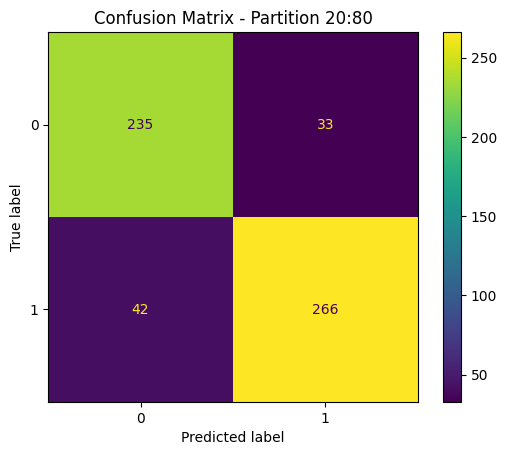

Dataset3 - Partition 50:50
Train Acc: 0.8519, Val Acc: 0.8504, Test Acc: 0.8607


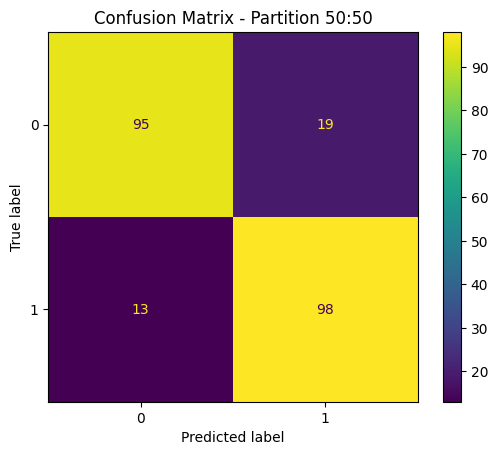

Dataset3 - Partition 80:20
Train Acc: 0.8569, Val Acc: 0.9028, Test Acc: 0.8426


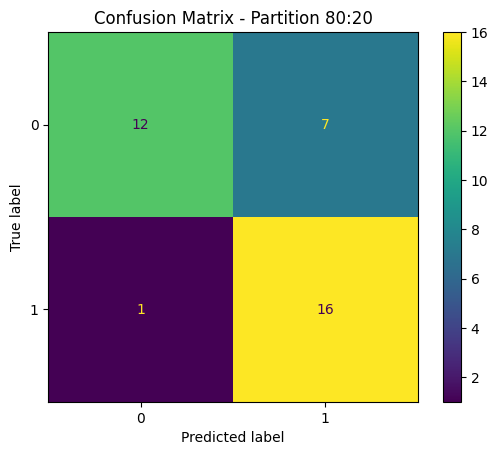

In [28]:
param_grid = {
    'C': [0.01,0.1, 1, 10, 100], 
    'penalty': ['l1','l2']
}

# Results storage
results_d3_log = []

# Main loop
X, y = dataset3[1], dataset3[2]
for test_size in test_sizes:
    train_acc_list, val_acc_list, test_acc_list = [], [], []

    for trial in range(n_trials):
        # print(trial)
        # Data splitting
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=trial)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=trial)

        # Hyperparameter tuning and training
        grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        # Accuracy calculations
        train_acc_list.append(accuracy_score(y_train, best_clf.predict(X_train)))
        val_acc_list.append(accuracy_score(y_val, best_clf.predict(X_val)))
        test_acc_list.append(accuracy_score(y_test, best_clf.predict(X_test)))

    # Compute and store average accuracies
    avg_train_acc = np.mean(train_acc_list)
    avg_val_acc = np.mean(val_acc_list)
    avg_test_acc = np.mean(test_acc_list)

    results_d3_log.append({
        "dataset": dataset3[0],
        "model": "Logistic Regression",
        "partition": f"{int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}",
        "train_acc": avg_train_acc,
        "val_acc": avg_val_acc,
        "test_acc": avg_test_acc
    })

    # Logging
    print(f"{dataset3[0]} - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    print(f"Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}, Test Acc: {avg_test_acc:.4f}")
    # Confusion Matrix
    cm = confusion_matrix(y_test, best_clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix - Partition {int(round(100 * (1 - test_size),0))}:{int(100 * test_size)}")
    plt.show()

In [29]:
results_d3_log

[{'dataset': 'Dataset3',
  'model': 'Logistic Regression',
  'partition': '20:80',
  'train_acc': 0.8740740740740741,
  'val_acc': 0.8472222222222222,
  'test_acc': 0.8692129629629629},
 {'dataset': 'Dataset3',
  'model': 'Logistic Regression',
  'partition': '50:50',
  'train_acc': 0.8518518518518517,
  'val_acc': 0.8503703703703703,
  'test_acc': 0.8607407407407407},
 {'dataset': 'Dataset3',
  'model': 'Logistic Regression',
  'partition': '80:20',
  'train_acc': 0.8569444444444444,
  'val_acc': 0.9027777777777778,
  'test_acc': 0.8425925925925926}]

In [30]:
X3_with_target = X3.copy()
X3_with_target['target'] = y3['Class']
correlations = X3_with_target.corr()['target'].drop('target')
top_10_features = correlations.abs().sort_values(ascending=False)

In [31]:
top_10_features

MajorAxisLength    0.673194
Perimeter          0.665981
Area               0.625715
ConvexArea         0.625567
MinorAxisLength    0.503102
Eccentricity       0.438500
Extent             0.154689
Name: target, dtype: float64

In [32]:
X_with_target = X_2.copy()
X_with_target['target'] = Y['class'].astype(int)
correlations = X_with_target.corr()['target'].drop('target')
top_10_features_d2 = correlations.abs().sort_values(ascending=False)

In [33]:
top_10_features_d2

polyuria              0.665922
polydipsia            0.648734
gender                0.449233
sudden_weight_loss    0.436568
partial_paresis       0.432288
polyphagia            0.342504
irritability          0.299467
alopecia              0.267512
visual_blurring       0.251300
weakness              0.243275
muscle_stiffness      0.122474
genital_thrush        0.110288
age                   0.108679
obesity               0.072173
delayed_healing       0.046980
itching               0.013384
Name: target, dtype: float64

In [34]:
import seaborn as sns

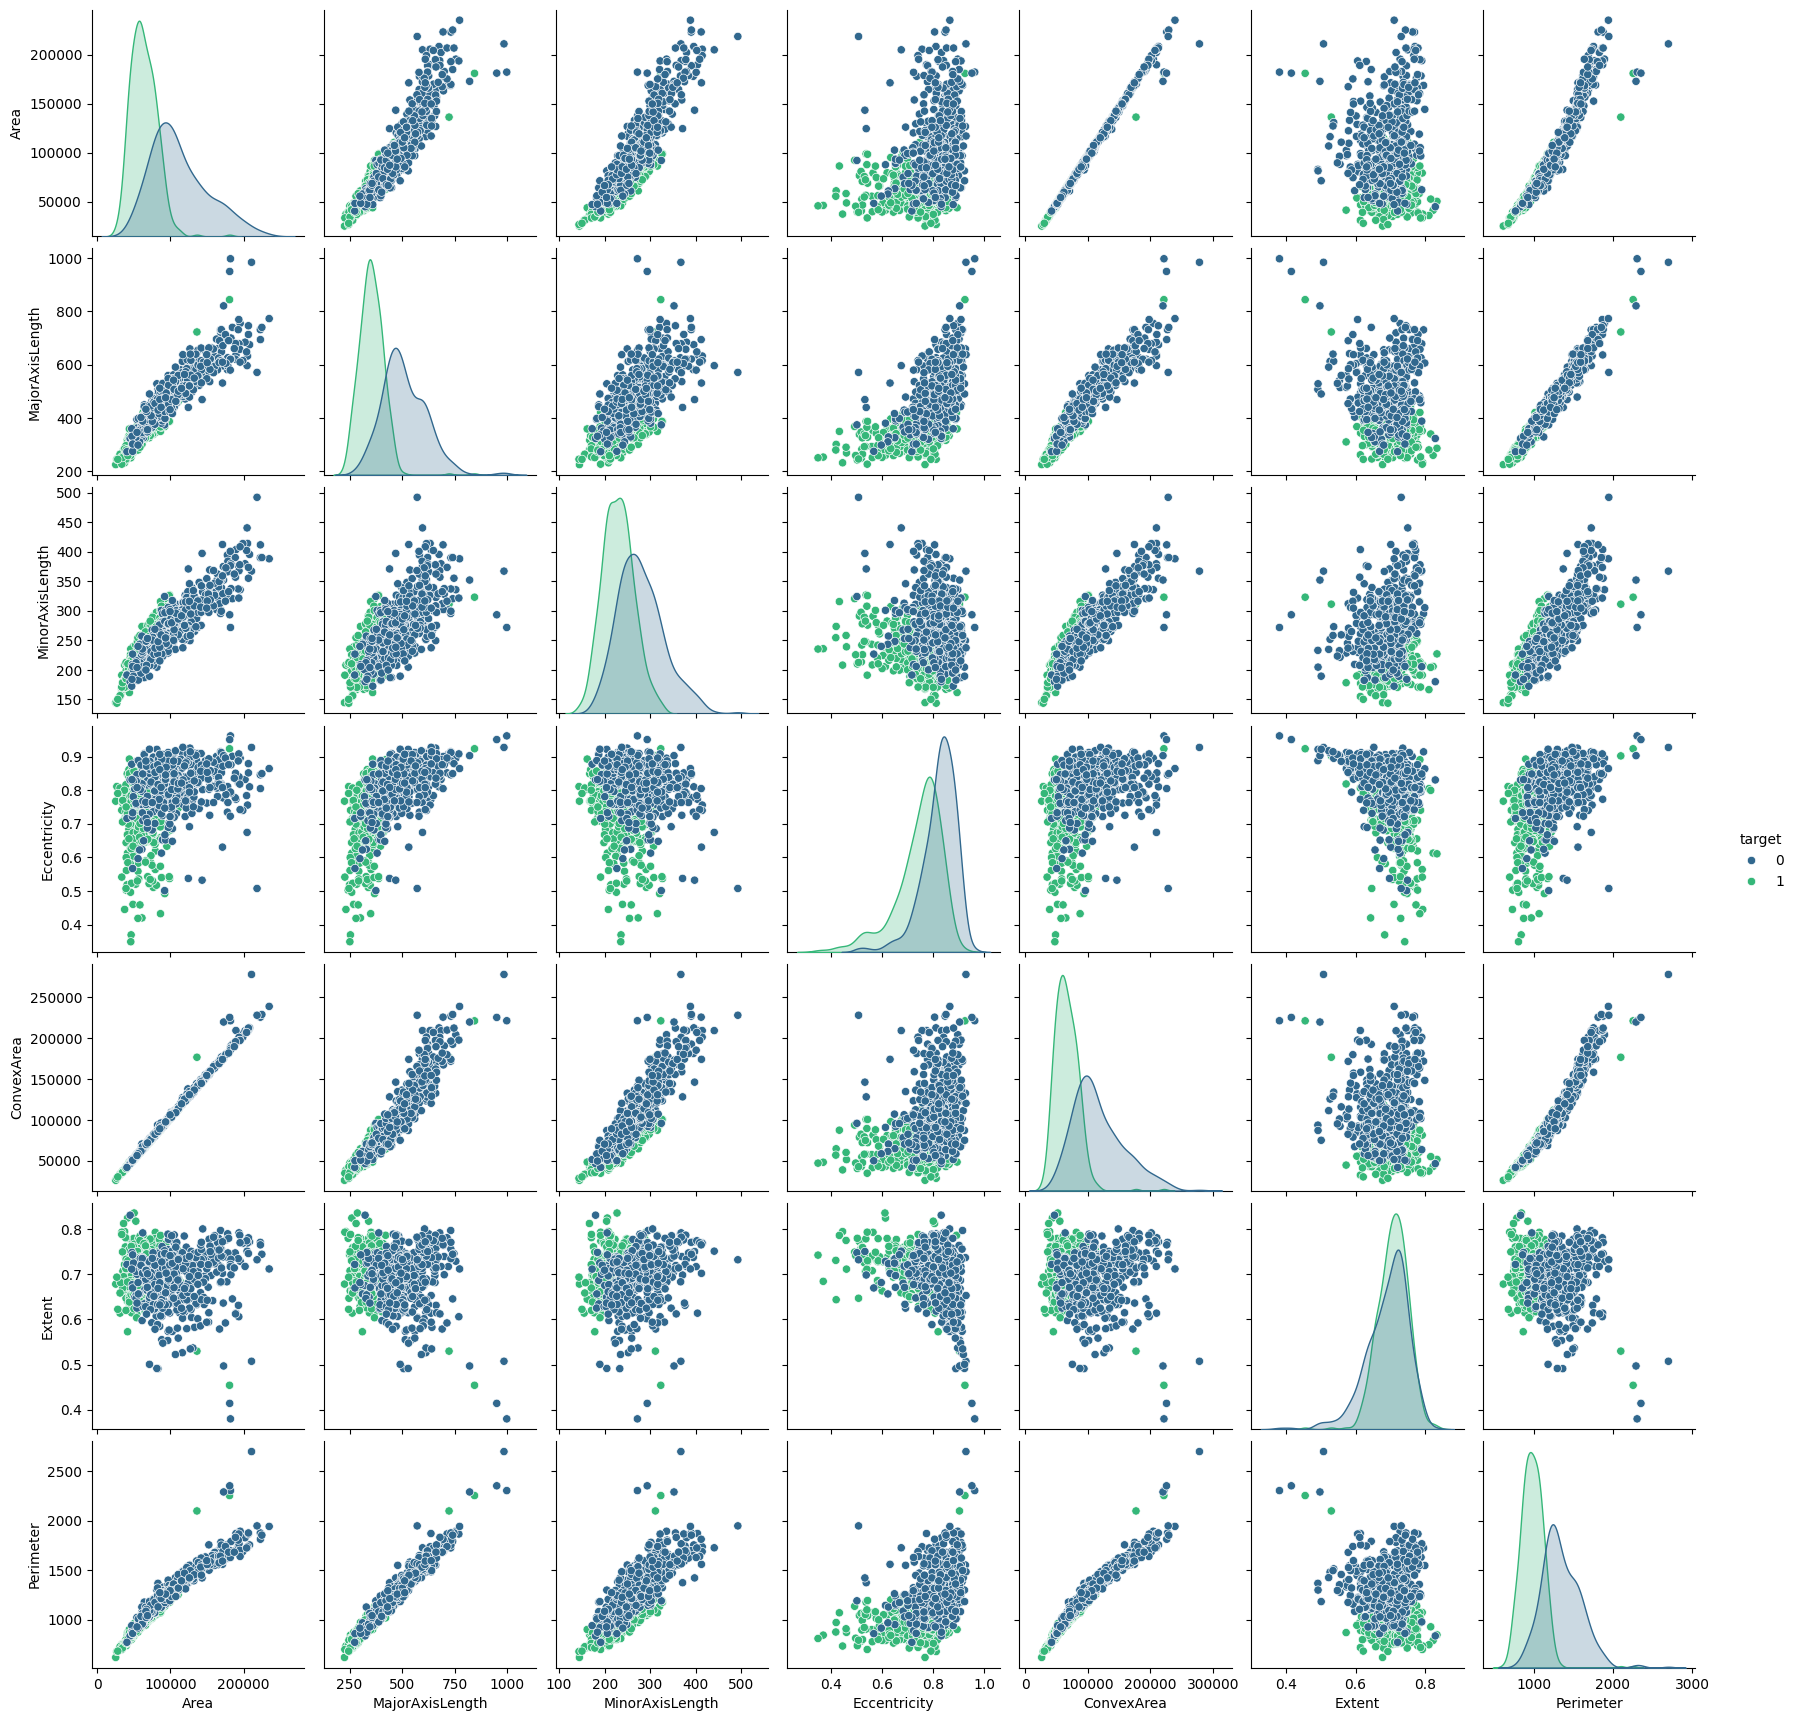

In [35]:
sns.pairplot(X3_with_target, hue='target', diag_kind='kde', palette='viridis')

In [36]:
X3_with_target

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,target
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'Extent'}>],
       [<Axes: title={'center': 'Perimeter'}>, <Axes: >, <Axes: >]],
      dtype=object)

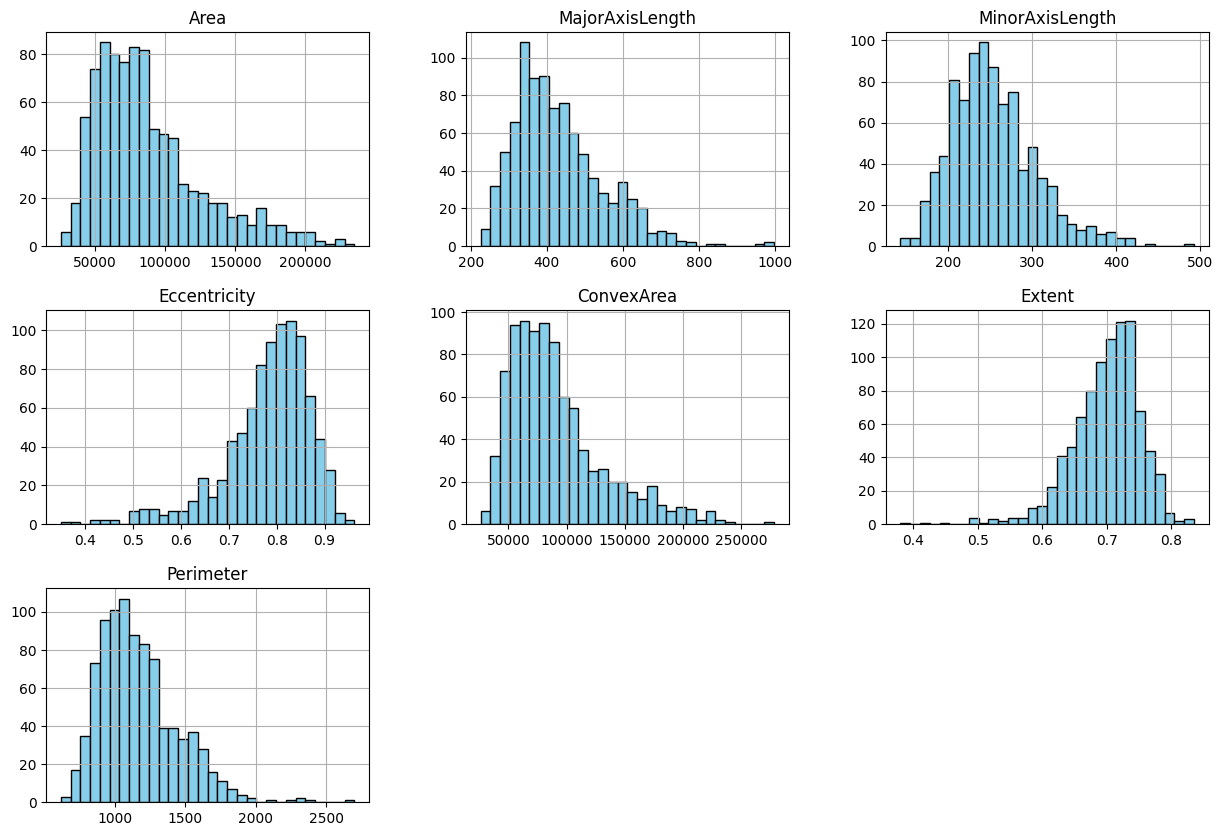

In [37]:
X3.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')

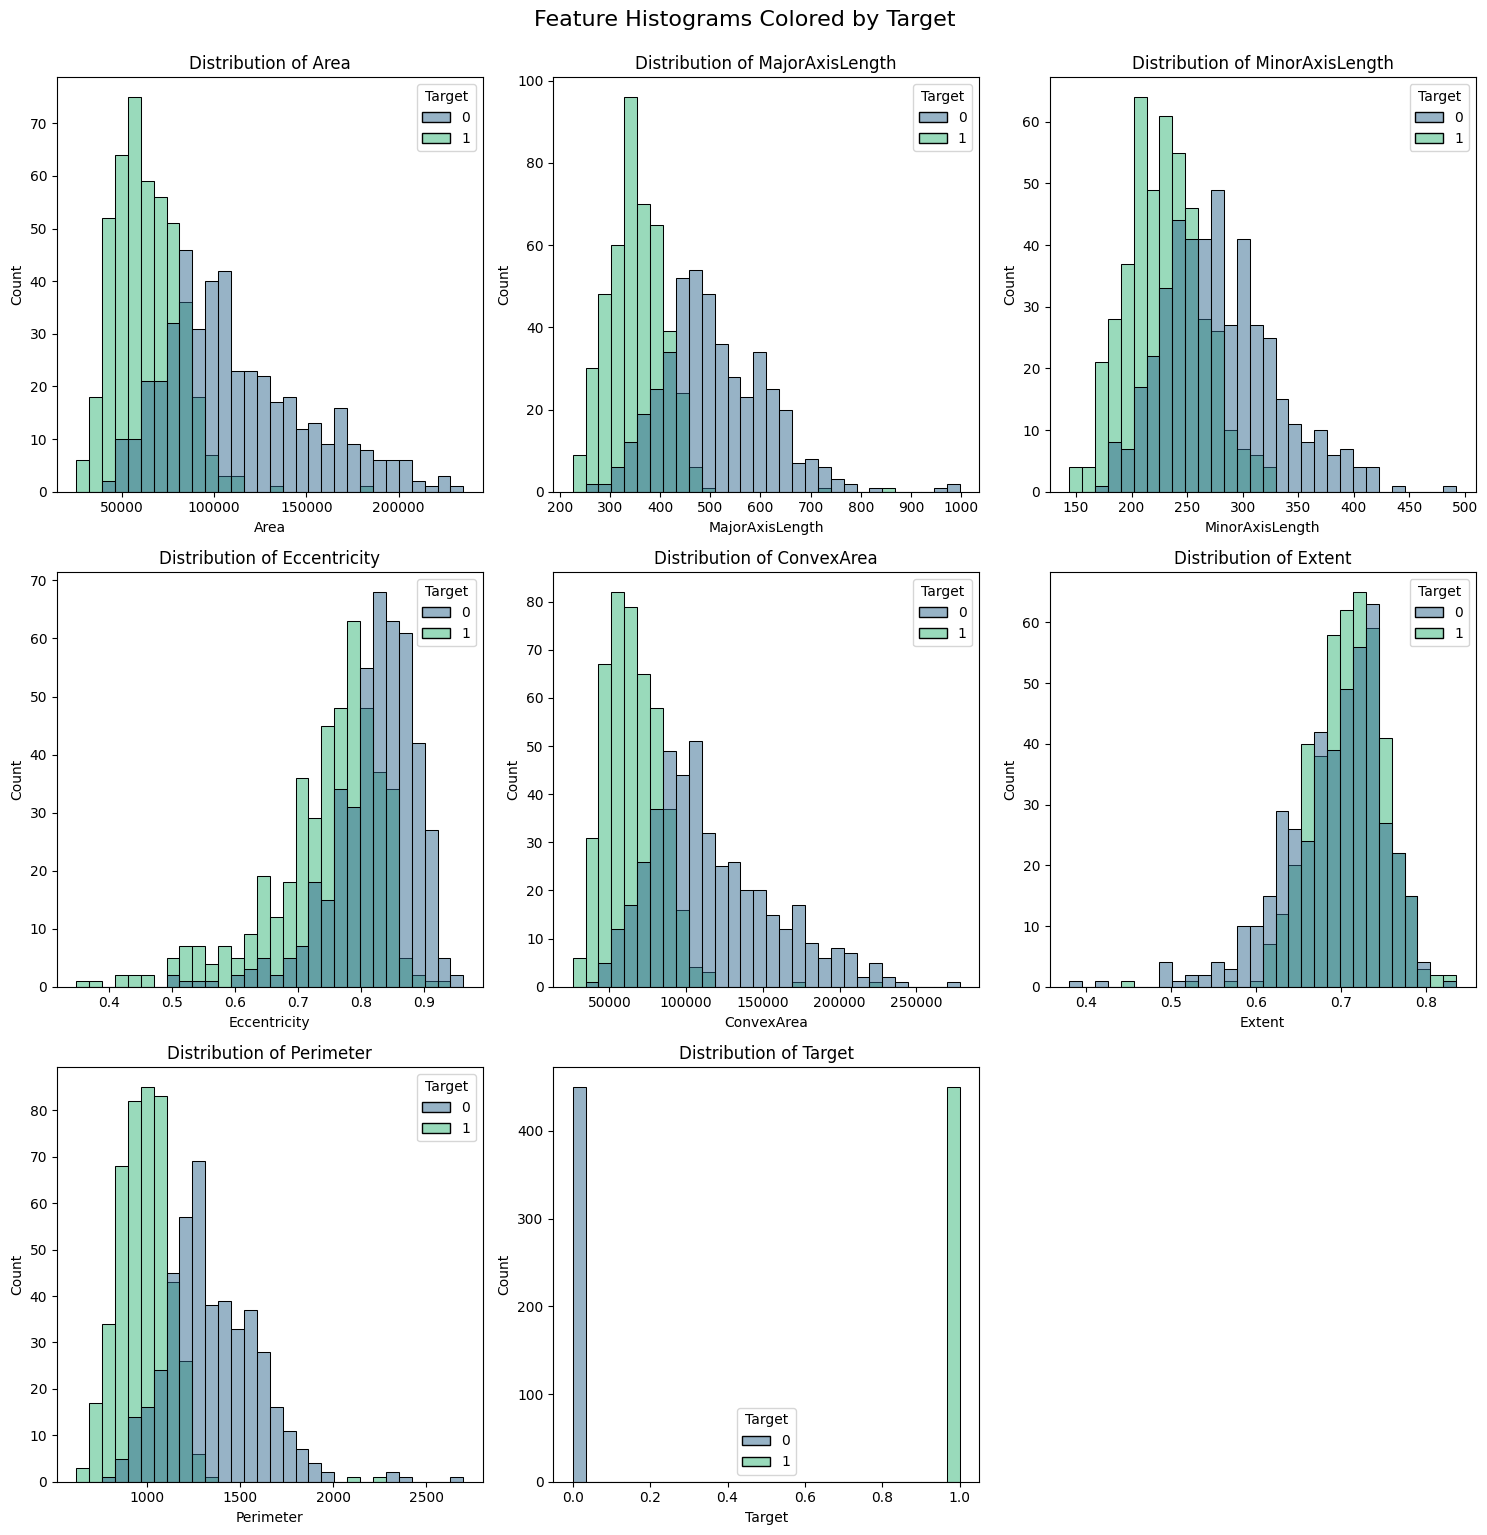

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your feature DataFrame and y is the target
data = X3.copy()
data['Target'] = y3['Class']  # Add the target column

# Plot histograms for each feature
features = data.columns  # List of feature names
num_features = len(features)

fig, axes = plt.subplots(nrows=(num_features // 3 + 1), ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(data=data, x=feature, hue='Target', kde=False, palette='viridis', ax=ax, bins=30)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Feature Histograms Colored by Target', y=1.02, fontsize=16)
plt.show()
